<a href="https://colab.research.google.com/github/Vishal35198/Linear_Reg-From-Scratch/blob/main/Notebook_Disease_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Disease Prediction Using Symptoms**

This Google Colab notebook demonstrates how machine learning models can be used to predict diseases based on symptoms. By leveraging models like **Gaussian Naive Bayes (GaussianNB)**, **Random Forest Classifier**, and **Support Vector Classifier (SVC)**, we aim to create a system that can provide reliable predictions using symptom-based data. These models are known for their efficiency and versatility in classification tasks, making them ideal for our use case.

## Libraries and Tools

### **scikit-learn (sklearn)**  
We use **scikit-learn**, a robust Python library, for implementing machine learning models. It provides an extensive collection of algorithms, tools for model evaluation, and preprocessing utilities, making it indispensable for machine learning workflows.

### **NumPy**  
**NumPy** is employed for numerical operations, such as handling arrays and performing mathematical computations efficiently.

### **Pandas**  
**Pandas** is used for data manipulation and analysis, including loading, cleaning, and preprocessing the symptom dataset. Its DataFrame structure simplifies the process of handling structured data.

## Key Features  
- Implementation of popular classification algorithms like GaussianNB, Random Forest, and SVC.
- Analysis of symptom data to predict associated diseases.
- Exploration of how different models perform using metrics like accuracy and confusion matrices.
- Data handling and preparation using **pandas** and **NumPy**.

This notebook is designed to serve as a hands-on guide for anyone interested in applying machine learning to healthcare and disease prediction. Let’s get started!


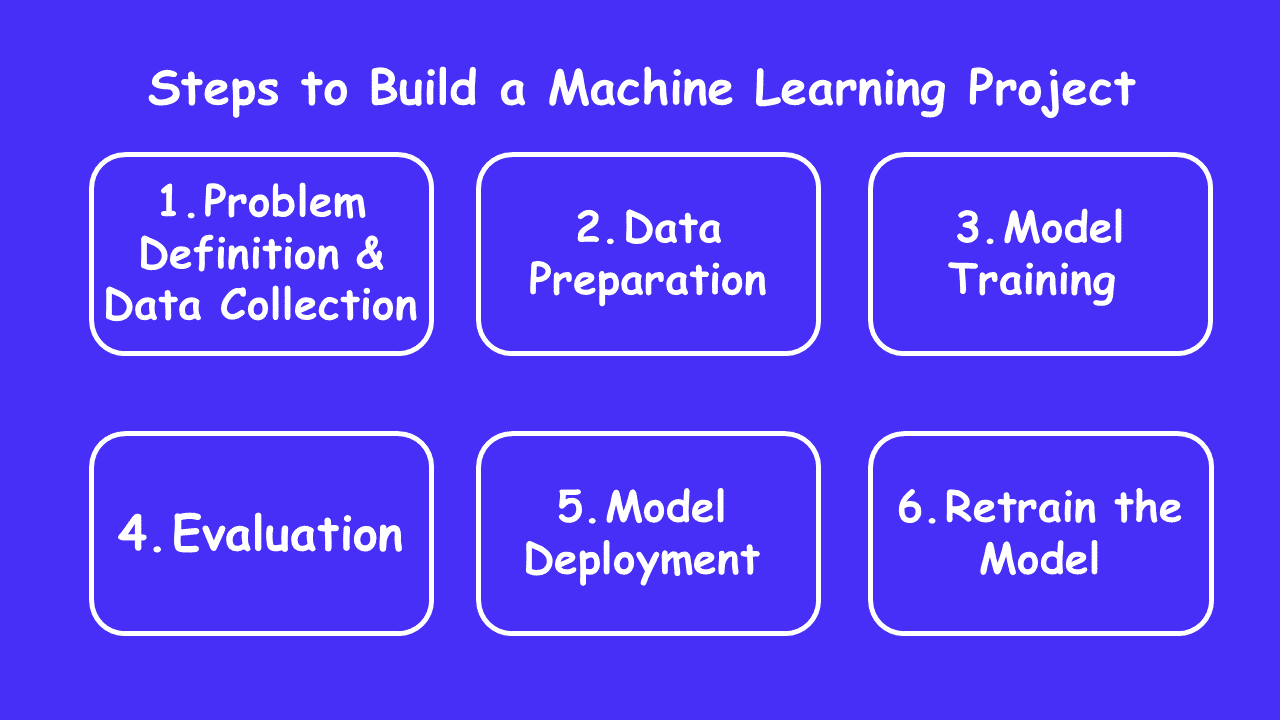

# Import Dependencies

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

# Data Pre Processing Using Pandas
*Proccesing data using the pandas*

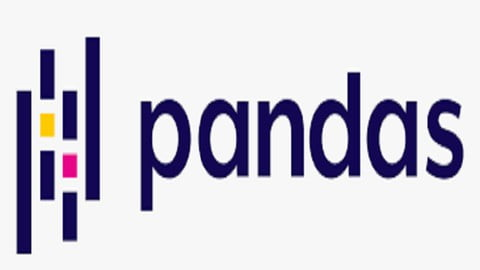

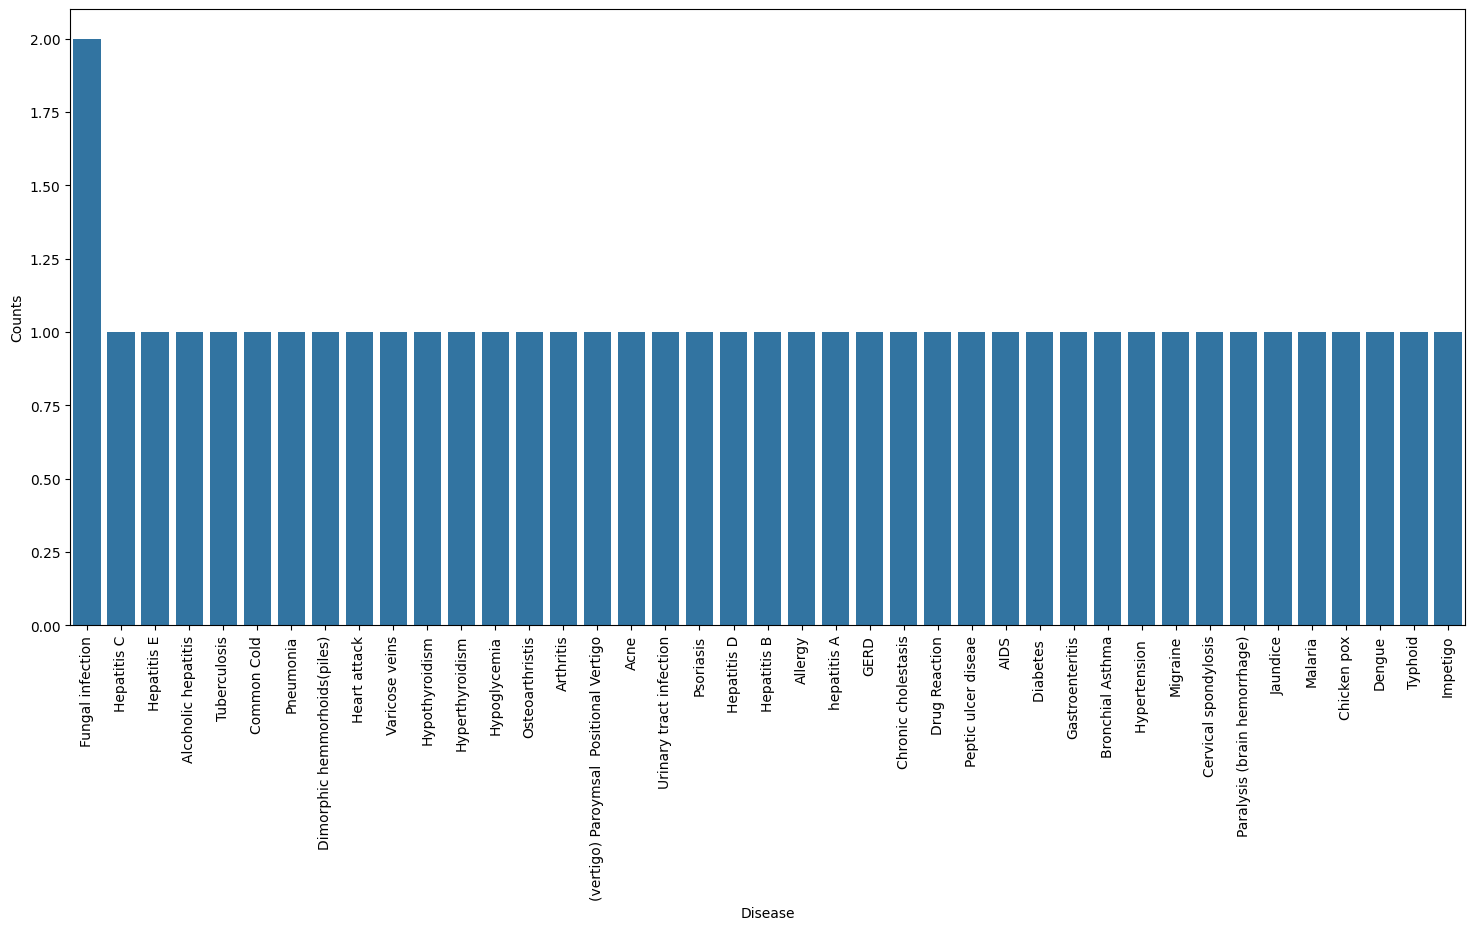

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Dataset.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
data["prognosis"]

,prognosis
0,15
1,4
2,16
3,9
4,14
5,33
6,1
7,12
8,17
9,6


# Train - Test Split the classics of Machine learning
*Using the Sklearn library to get train and test split*

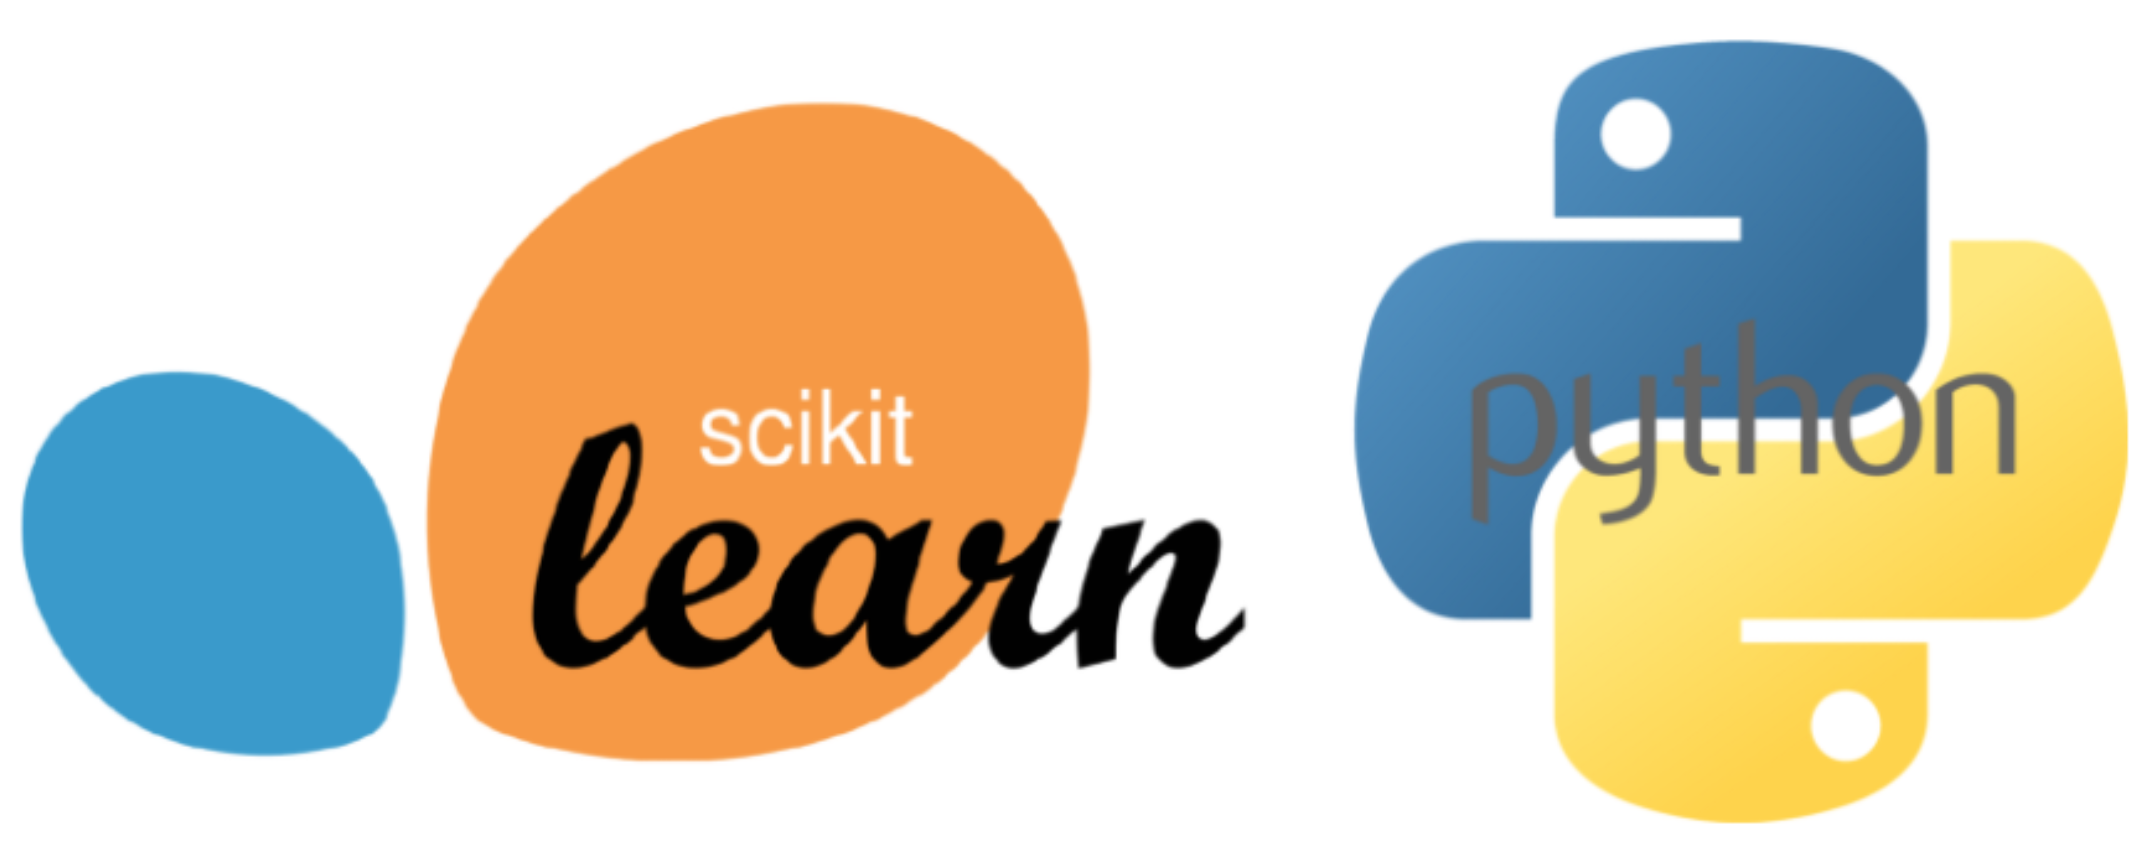

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
X_train.shape

(33, 132)

In [ ]:
y_train.head()

,prognosis
31,26
20,19
30,39
16,8
6,1


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 2,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808
Gaussian NB
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


# Model training , Accuracy , Error , Metrics

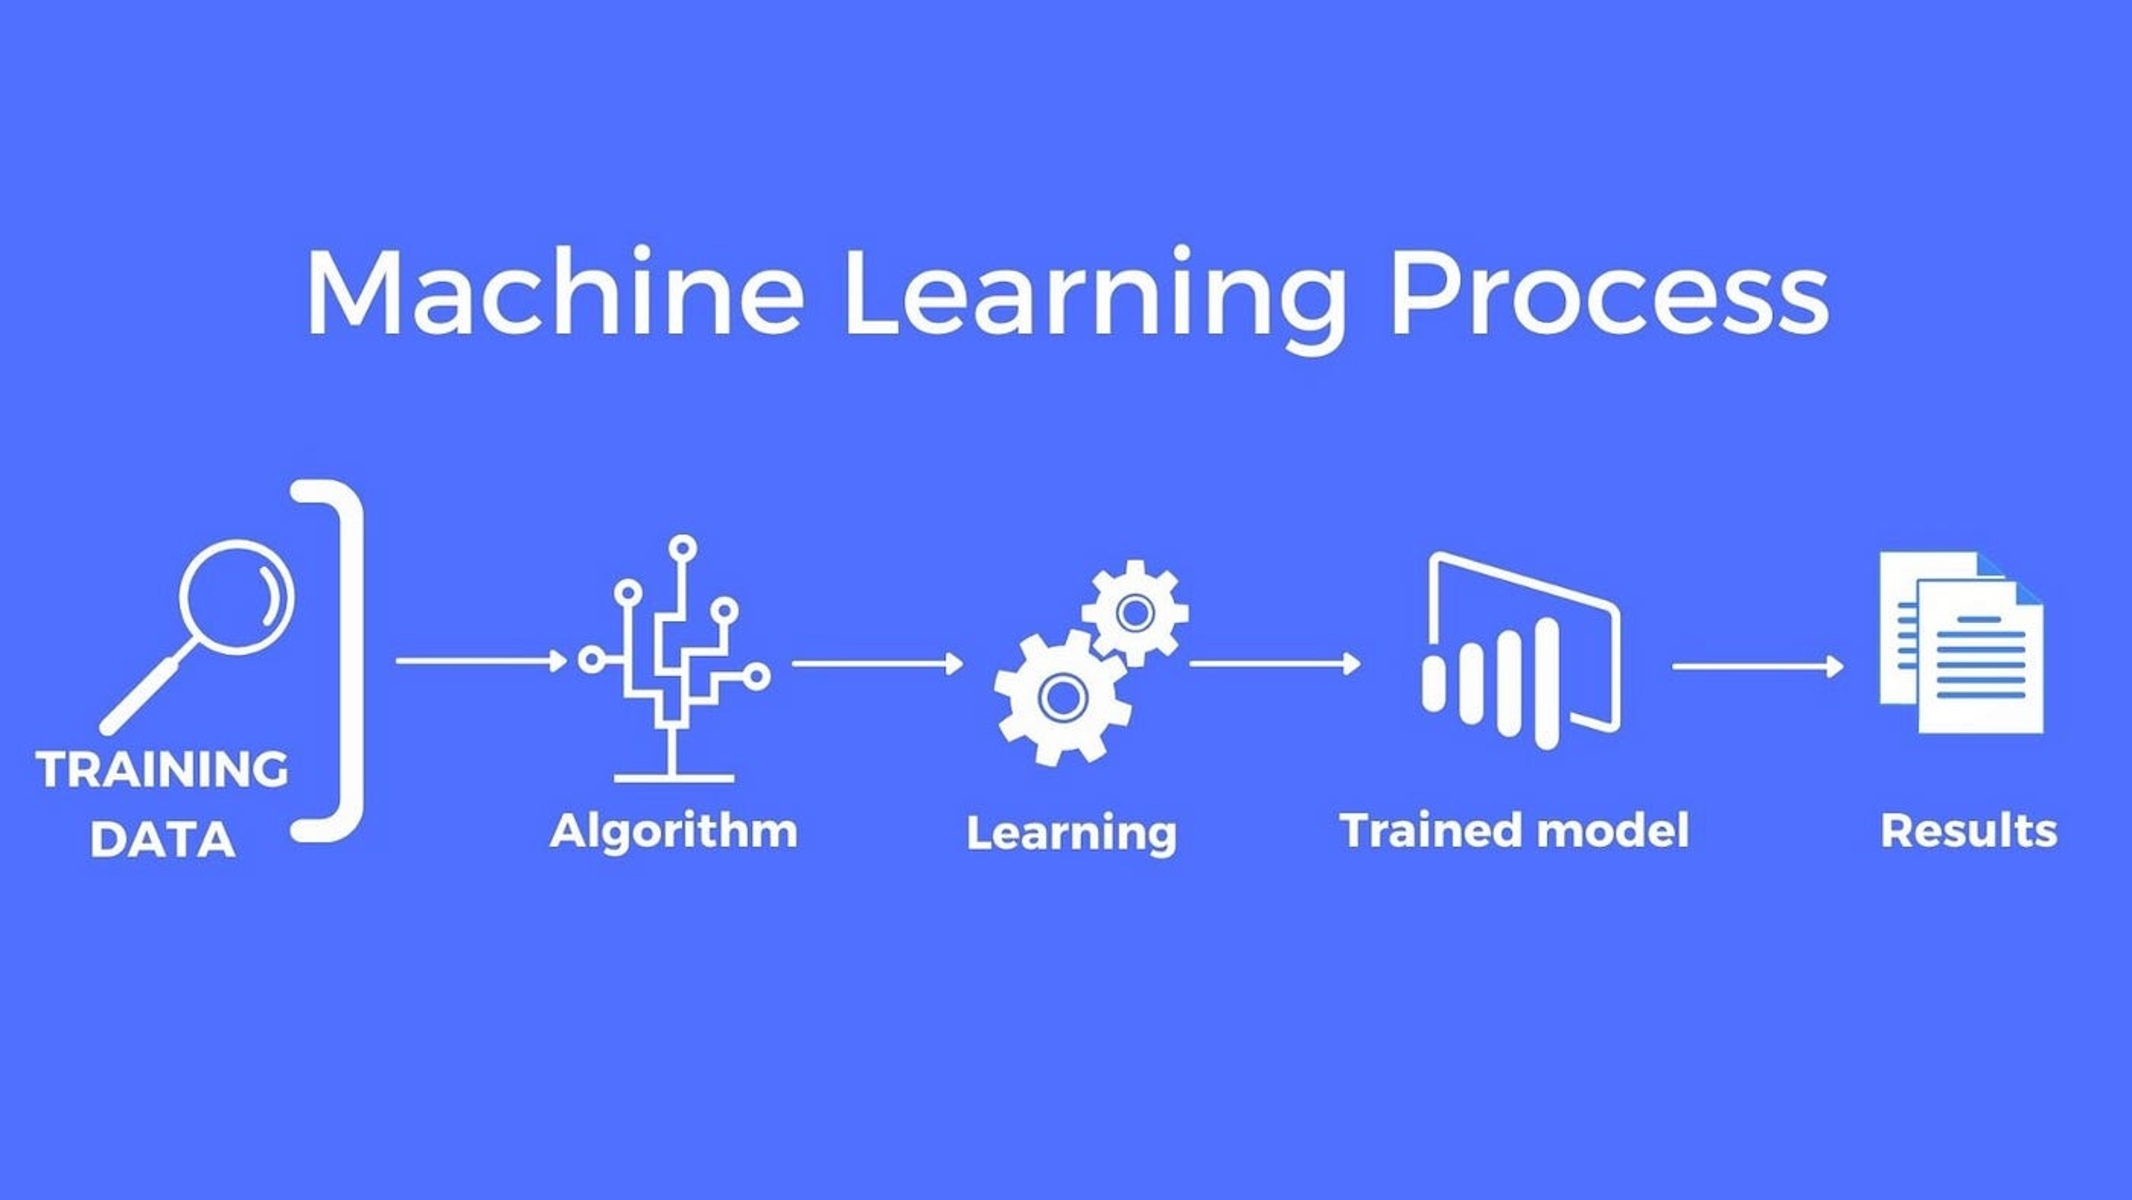

In [ ]:
train_dict = {}
test_dict = {}

Accuracy on train data by SVC Classifier  : 90.9090909090909
Accuracy on test data by SVC Classifier  : 85.0


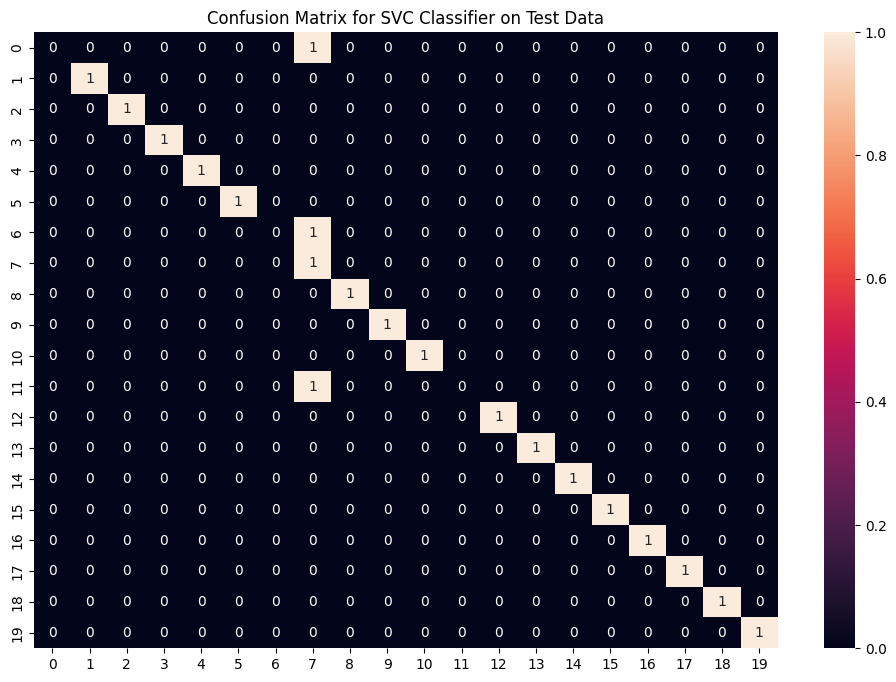

Accuracy on train data by Gaussian NB Classifier  : 100.0
Accuracy on test data by Gaussian NB Classifier  : 100.0


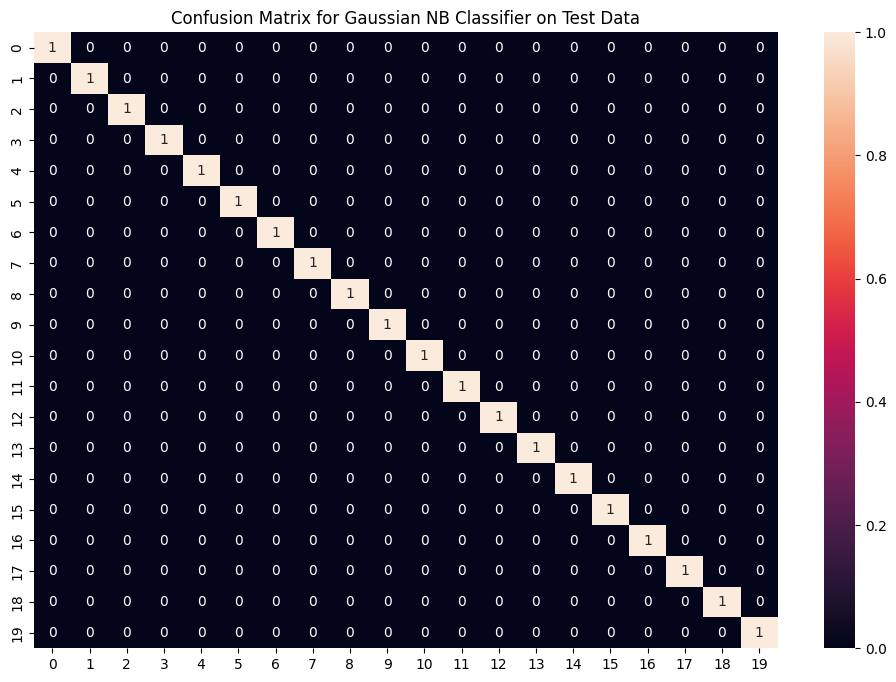

Accuracy on train data by Random Forest Classifier  : 100.0
Accuracy on test data by Random Forest Classifier  : 100.0


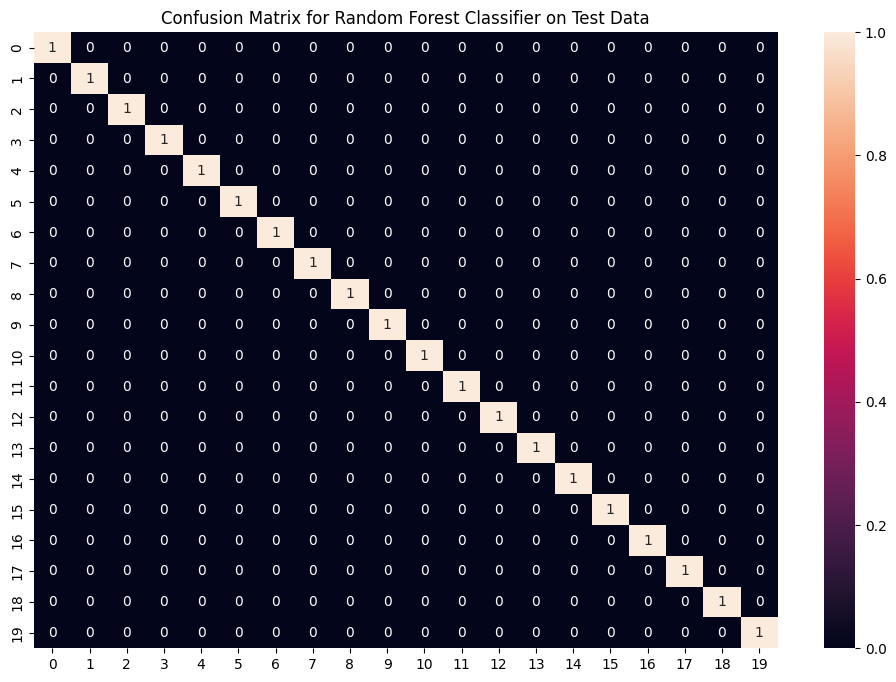

In [ ]:
# Training and testing SVM Classifier
for model_name in models:
  model = models[model_name]
  # svm_model = SVC()
  model.fit(X_train, y_train)
  preds = model.predict(X_train[10:30])
  train_acc = accuracy_score(y_train, model.predict(X_train))*100
  print(f"Accuracy on train data by {model_name} Classifier\
  : {train_acc}")
  test_acc = accuracy_score(y_train[10:30], preds)*100
  print(f"Accuracy on test data by {model_name} Classifier\
  : {test_acc}")
  train_dict[model_name] = train_acc
  test_dict[model_name] = test_acc
  cf_matrix = confusion_matrix(y_train[10:30],preds)
  plt.figure(figsize=(12,8))
  sns.heatmap(cf_matrix, annot=True)
  plt.title(f"Confusion Matrix for {model_name} Classifier on Test Data")
  plt.show()


# Visualize the train and test Error

In [ ]:
train_dict , test_dict

({'SVC': 90.9090909090909, 'Gaussian NB': 100.0, 'Random Forest': 100.0},
 {'SVC': 85.0, 'Gaussian NB': 100.0, 'Random Forest': 100.0})

Text(0.5, 1.0, 'Train Accuracy of Model')

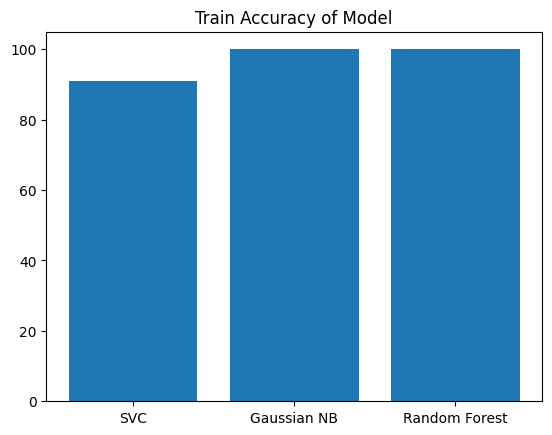

In [ ]:
# plotting train graphs
fig,axes = plt.subplots()
axes.bar(train_dict.keys(),train_dict.values())
axes.set_title('Train Accuracy of Model')

Text(0, 0.5, 'Models')

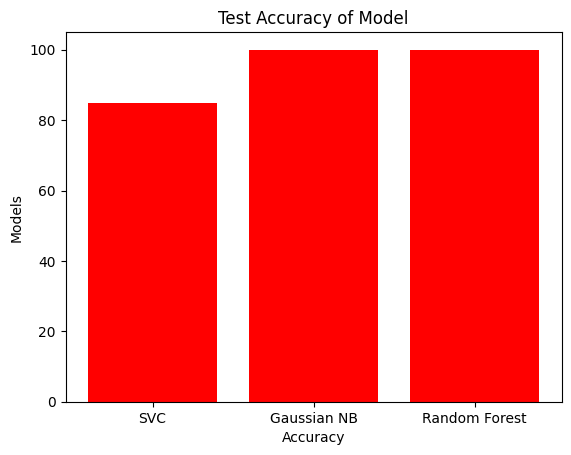

In [ ]:
# plotting train graphs
axes = plt.subplot()
axes.bar(test_dict.keys(),test_dict.values(),color='r')
axes.set_title('Test Accuracy of Model')
axes.set_xlabel('Accuracy',)
axes.set_ylabel('Models')

# **NLP**
*Using Spacy for NLP and extracting the important symptims from the user query or messages this can be included in the chatbots system for disesase prediction*

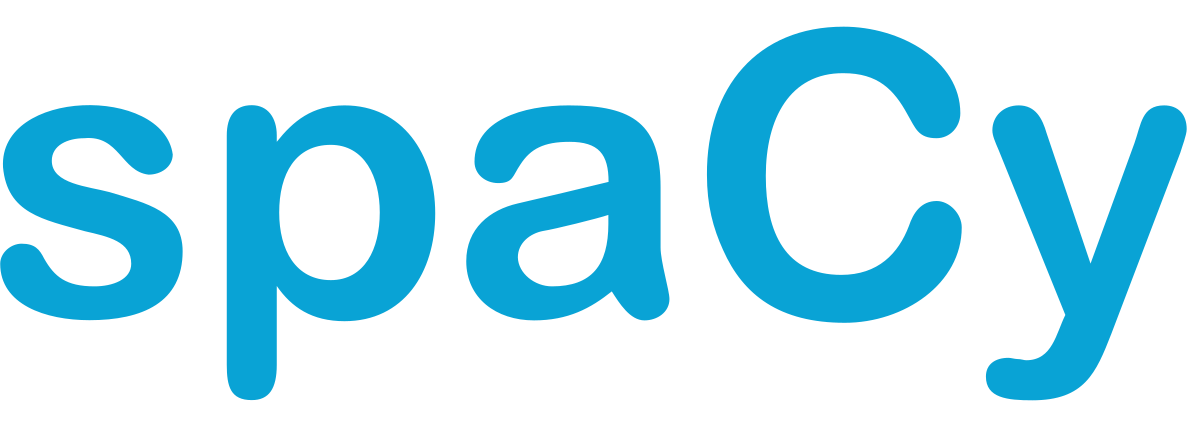

In [ ]:
all_symptom = list(X_train.columns)

In [ ]:
msg = str(list(X_train.iloc[0].index))
msg

"['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bo

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(msg)

matched_words = [token.text for token in doc if token.text.lower() in all_symptom]

matched_words


['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 '

### Prediction Pipeline

In [ ]:
def prediction_pipeline(msg):
  doc = nlp(msg)

  matched_words = [token.text for token in doc if token.text.lower() in all_symptom]

  matched_words

  if len(matched_words) < 100:
    print("The values are less please specifcy more values....the prediction maybe awkward....!!!! ")

  construct_x = np.zeros((1,len(all_symptom)))

  for i in range(len(all_symptom)):
    if all_symptom[i] in matched_words:
      construct_x[0][i] = 1

  # ser = pd.Series(construct_x,data=)
  df_temp = pd.DataFrame(columns = all_symptom ,data = construct_x)
  # df_temp._append(construct_x,index = True)
  # print(df_temp.head(1))

  pred = models['Gaussian NB'].predict(df_temp)

  return encoder.classes_[pred]


# Custom Messages

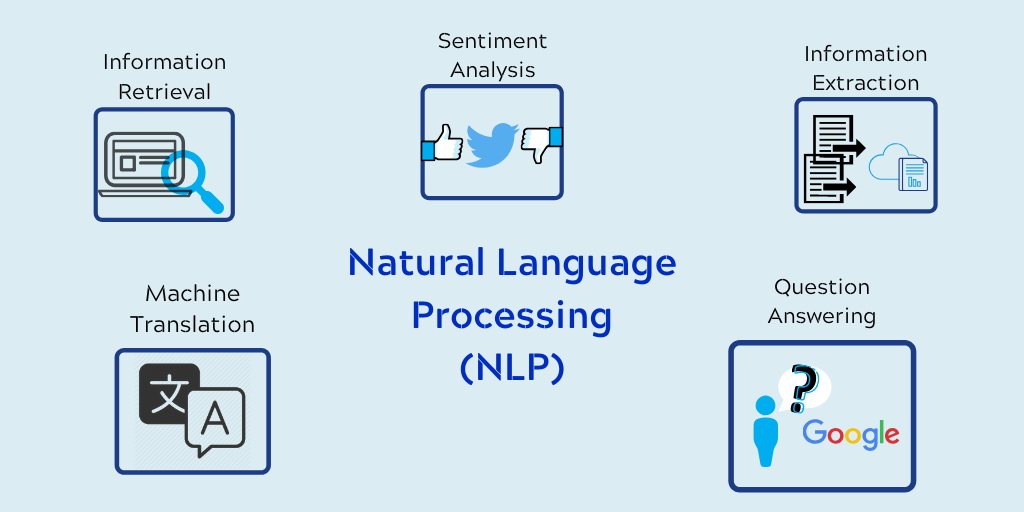

In [ ]:
msg1 = "I've been experiencing itching, skin_rash, and nodal_skin_eruptions for a week now. It started with continuous_sneezing, shivering, and chills, but now it's escalated to joint_pain, stomach_pain, and even acidity. I’ve noticed ulcers_on_tongue, vomiting, and a burning_micturition sensation. There’s also spotting_urination, fatigue, and weight_loss. My hands feel like cold_hands_and_feets, and there are patches_in_throat. I’ve also had a cough, high_fever, and breathlessness, coupled with dehydration, indigestion, and headache. My skin has turned yellowish_skin, my eyes are yellowing_of_eyes, and I’m battling dark_urine, loss_of_appetite, and back_pain."
msg2 = "Last night, I felt severe abdominal_pain and started experiencing diarrhoea, mild_fever, and yellow_urine. It got worse with sunken_eyes, fluid_overload, and swelling_of_stomach. I also noticed swelled_lymph_nodes, a general feeling of malaise, and blurred_and_distorted_vision. There was phlegm, throat_irritation, and redness_of_eyes, along with sinus_pressure and a runny_nose. My chest_pain and weakness_in_limbs made it hard to breathe, and my fast_heart_rate was alarming. Other symptoms included bloody_stool, neck_pain, dizziness, and cramps. This morning, my swollen_legs, swollen_blood_vessels, and puffy_face_and_eyes made me even more concerned."

In [ ]:
msg1

"I've been experiencing itching, skin_rash, and nodal_skin_eruptions for a week now. It started with continuous_sneezing, shivering, and chills, but now it's escalated to joint_pain, stomach_pain, and even acidity. I’ve noticed ulcers_on_tongue, vomiting, and a burning_micturition sensation. There’s also spotting_urination, fatigue, and weight_loss. My hands feel like cold_hands_and_feets, and there are patches_in_throat. I’ve also had a cough, high_fever, and breathlessness, coupled with dehydration, indigestion, and headache. My skin has turned yellowish_skin, my eyes are yellowing_of_eyes, and I’m battling dark_urine, loss_of_appetite, and back_pain."

In [ ]:
print(f"The predicted disease for this msg is {prediction_pipeline(msg1)[0]}")

The values are less please specifcy more values....the prediction maybe awkward....!!!! 
The predicted disease for this msg is Hepatitis D


In [ ]:
msg2 = "I woke up feeling extremely tired and noticed symptoms like itching and skin rash that quickly turned into nodal skin eruptions. Continuous sneezing followed, along with shivering and chills. My joints ached, and I had stomach pain coupled with acidity and ulcers on the tongue. Vomiting and burning micturition started later in the day, along with spotting during urination and extreme fatigue. I’ve lost weight recently and feel anxious all the time. My hands and feet are cold, and I often experience mood swings and lethargy. There are patches in my throat, and I’ve been coughing with a high fever. My eyes look sunken, and breathlessness is becoming a problem, accompanied by sweating and dehydration. Indigestion and headaches have also been troubling me, and I’ve noticed my skin turning yellowish, with dark urine and a complete loss of appetite. To make matters worse, I have pain behind the eyes and constant back pain. Constipation and abdominal pain are frequent now, and I occasionally suffer from diarrhoea and mild fever. My urine looks yellow, and the whites of my eyes are yellowing as well. I’m worried it could be something serious as I’ve felt swelling in my stomach and swelled lymph nodes. My body feels weak, with fast heart rates at times, and dizziness has been an ongoing issue. I don’t know if this is all connected, but the symptoms are overwhelming and getting worse by the day."

In [ ]:
msg2

'I woke up feeling extremely tired and noticed symptoms like itching and skin rash that quickly turned into nodal skin eruptions. Continuous sneezing followed, along with shivering and chills. My joints ached, and I had stomach pain coupled with acidity and ulcers on the tongue. Vomiting and burning micturition started later in the day, along with spotting during urination and extreme fatigue. I’ve lost weight recently and feel anxious all the time. My hands and feet are cold, and I often experience mood swings and lethargy. There are patches in my throat, and I’ve been coughing with a high fever. My eyes look sunken, and breathlessness is becoming a problem, accompanied by sweating and dehydration. Indigestion and headaches have also been troubling me, and I’ve noticed my skin turning yellowish, with dark urine and a complete loss of appetite. To make matters worse, I have pain behind the eyes and constant back pain. Constipation and abdominal pain are frequent now, and I occasionally

In [ ]:
prediction_pipeline(msg2)[0]

The values are less please specifcy more values....the prediction maybe awkward....!!!! 


'Allergy'

In [ ]:
prediction_pipeline(msg)

array(['Common Cold'], dtype=object)